# Traditional AI Techniques

In [217]:
import os
import sys
import glob
# Construct the path
path = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
# print(path)
# Add the path to sys.path
sys.path.append(path)
# Change the working directory
os.chdir(path)

# Imports
import pandas as pd
import numpy as np

import matplotlib as plt
import tkinter as tk
from tkinter import scrolledtext

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error





In [120]:
# Construct one complete dataset
path = r"C:\Users\HugoP\Desktop\SmartWF-Capstone\Models\Must\\" # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep="\t")
    li.append(df)

must_df = pd.concat(li, axis=0, ignore_index=True)
# print(must_df)

# Choose wich target_DEL to train the models on:

In [190]:
target_DEL = 'Leq_x'
# target_DEL = 'Leq_y'
# target_DEL = 'Leq_res'


# Splitting,
Train-Validation-Test

In [191]:
# Split dataset in unique Windspeed-STDeV combinations and repeated combinations
selection_multiple = ((must_df['Windspeed'] >= 15) & (must_df['STDeV'] >= 1.00))
must_df_multiple = must_df[selection_multiple]
must_df_unique = must_df[~selection_multiple]

print("All items in must_df_multiple occur 5 times:",
    (must_df_multiple.groupby(['Windspeed', 'STDeV']).size().reset_index(name='count')['count']==5).all())
print("All items in must_df_multiple occur 5 times:",
      (must_df_unique.groupby(['Windspeed', 'STDeV']).size().reset_index(name='count')['count']==1).all())

# Split repeated combinations (2-2-2 distribution)
must_df_multiple['stratify_col'] = must_df_multiple['Windspeed'].astype(str) + '_' + must_df_multiple['STDeV'].astype(str)
X_multiple = must_df_multiple[['Windspeed', 'STDeV', 'stratify_col']]
y_multiple = must_df_multiple[target_DEL]

X_train_multiple, X_test_val_multiple, y_train_multiple, y_test_val_multiple = train_test_split(X_multiple, y_multiple, test_size=4/6, stratify=must_df_multiple['stratify_col'])
X_val_multiple, X_test_multiple, y_val_multiple, y_test_multiple = train_test_split(X_test_val_multiple, y_test_val_multiple, test_size=0.5, stratify=X_test_val_multiple['stratify_col'])

# Drop stratify column
X_train_multiple = X_train_multiple.drop(columns=['stratify_col'])
X_test_val_multiple = X_test_val_multiple.drop(columns=['stratify_col'])
X_val_multiple = X_val_multiple.drop(columns=['stratify_col'])
X_test_multiple = X_test_multiple.drop(columns=['stratify_col'])

# Split unique combinations
X_unique = must_df_unique[['Windspeed', 'STDeV']]
y_unique = must_df_unique[target_DEL]

X_train_unique, X_test_val_unique, y_train_unique, y_test_val_unique = train_test_split(X_unique, y_unique,test_size=4/6)
X_val_unique, X_test_unique, y_val_unique, y_test_unique = train_test_split(X_test_val_unique, y_test_val_unique, test_size=0.5)

# Combine to final datasets
X_train = pd.concat((X_train_unique, X_train_multiple))
X_val = pd.concat((X_val_unique, X_val_multiple))
X_test = pd.concat((X_test_unique, X_test_multiple))

y_train = pd.concat((y_train_unique, y_train_multiple))
y_val = pd.concat((y_val_unique, y_val_multiple))
y_test = pd.concat((y_test_unique, y_test_multiple))

train = pd.concat((X_train, y_train), axis=1)
val = pd.concat((X_val, y_val), axis=1)
test = pd.concat((X_test, y_test), axis=1)

train_val_test_dict = {"training": train, "validation": val, "testing":test}


All items in must_df_multiple occur 5 times: True
All items in must_df_multiple occur 5 times: True


C:\Users\HugoP\AppData\Local\Temp\ipykernel_4148\214238036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  must_df_multiple['stratify_col'] = must_df_multiple['Windspeed'].astype(str) + '_' + must_df_multiple['STDeV'].astype(str)


# Splitting,
Training-Test

In [223]:
# Split dataset in unique Windspeed-STDeV combinations and repeated combinations
selection_multiple = ((must_df['Windspeed'] >= 15) & (must_df['STDeV'] >= 1.00))
must_df_multiple = must_df[selection_multiple]
must_df_unique = must_df[~selection_multiple]

print("All items in must_df_multiple occur 5 times:",
    (must_df_multiple.groupby(['Windspeed', 'STDeV']).size().reset_index(name='count')['count']==5).all())
print("All items in must_df_multiple occur 5 times:",
      (must_df_unique.groupby(['Windspeed', 'STDeV']).size().reset_index(name='count')['count']==1).all())

# Split repeated combinations (2-2-2 distribution)
must_df_multiple['stratify_col'] = must_df_multiple['Windspeed'].astype(str) + '_' + must_df_multiple['STDeV'].astype(str)
X_multiple = must_df_multiple[['Windspeed', 'STDeV', 'stratify_col']]
y_multiple = must_df_multiple[target_DEL]

X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=2/6, stratify=must_df_multiple['stratify_col'])

# Drop stratify column
X_train_multiple = X_train_multiple.drop(columns=['stratify_col'])
X_test_multiple = X_test_multiple.drop(columns=['stratify_col'])

# Split unique combinations
X_unique = must_df_unique[['Windspeed', 'STDeV']]
y_unique = must_df_unique[target_DEL]

X_train_unique, X_test_unique, y_train_unique, y_test_unique = train_test_split(X_unique, y_unique,test_size=2/6)

# Combine to final datasets
X_train = pd.concat((X_train_unique, X_train_multiple))
X_test = pd.concat((X_test_unique, X_test_multiple))

y_train = pd.concat((y_train_unique, y_train_multiple))
y_test = pd.concat((y_test_unique, y_test_multiple))

train = pd.concat((X_train, y_train), axis=1)
test = pd.concat((X_test, y_test), axis=1)

train_test_dict = {"training":train, "testing": test}

All items in must_df_multiple occur 5 times: True
All items in must_df_multiple occur 5 times: True


C:\Users\HugoP\AppData\Local\Temp\ipykernel_4148\2634913336.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  must_df_multiple['stratify_col'] = must_df_multiple['Windspeed'].astype(str) + '_' + must_df_multiple['STDeV'].astype(str)


# Several plot functions

In [224]:
from Models.Must.Traditional_AI_techniques.Plot_data import *

# KNN

In [225]:
# Since we use cross validation, we only need train and test dataset.
# Input features
train = train_test_dict['training']
test = train_test_dict['testing']

X_train, y_train = train[['Windspeed', 'STDeV']], train[target_DEL]
X_test, y_test = test[['Windspeed', 'STDeV']], test[target_DEL]

print(X_train.size)
print(X_test.size)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6448
3228


In [226]:
# Training without tuning
knn_untuned = KNeighborsRegressor()
knn_untuned.fit(X_train, y_train)
knn_untuned_pred = knn_untuned.predict(X_test)
knn_untuned_mae = mean_absolute_error(y_test, knn_untuned_pred)
print("MAE for default KNN model on test set: ", knn_untuned_mae)

# Training, tuning with GridSearchCV
knn = KNeighborsRegressor()
knn_param_grid = {'n_neighbors': [3, 5, 10, 15],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]
                }

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='neg_mean_absolute_error')
knn_grid_search.fit(X_train, y_train)

print("Best parameters: ", knn_grid_search.best_params_)
knn_best = knn_grid_search.best_estimator_

# Validate the best model using cross_val_score
CV_scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validation scores:", CV_scores)
print("Mean cross-validation score:", -CV_scores.mean())

knn_best_pred = knn_best.predict(X_test)
knn_best_mae = mean_absolute_error(y_test, knn_best_pred)
print("MAE for tuned KNN model on test set: ", knn_best_mae)

MAE for default KNN model on test set:  974.8636544477259
Best parameters:  {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
Cross-validation scores: [ -368.25610614  -919.46464977 -1167.18708135 -1163.14988725
 -1057.60321526]
Mean cross-validation score: 935.1321879563624
MAE for tuned KNN model on test set:  894.6341593596121


In [229]:
# Rescaling of features
X_train_rescaled = scaler.inverse_transform(X_train)
X_val_rescaled = scaler.inverse_transform(X_val)
X_test_rescaled = scaler.inverse_transform(X_test)

Several plots of result:


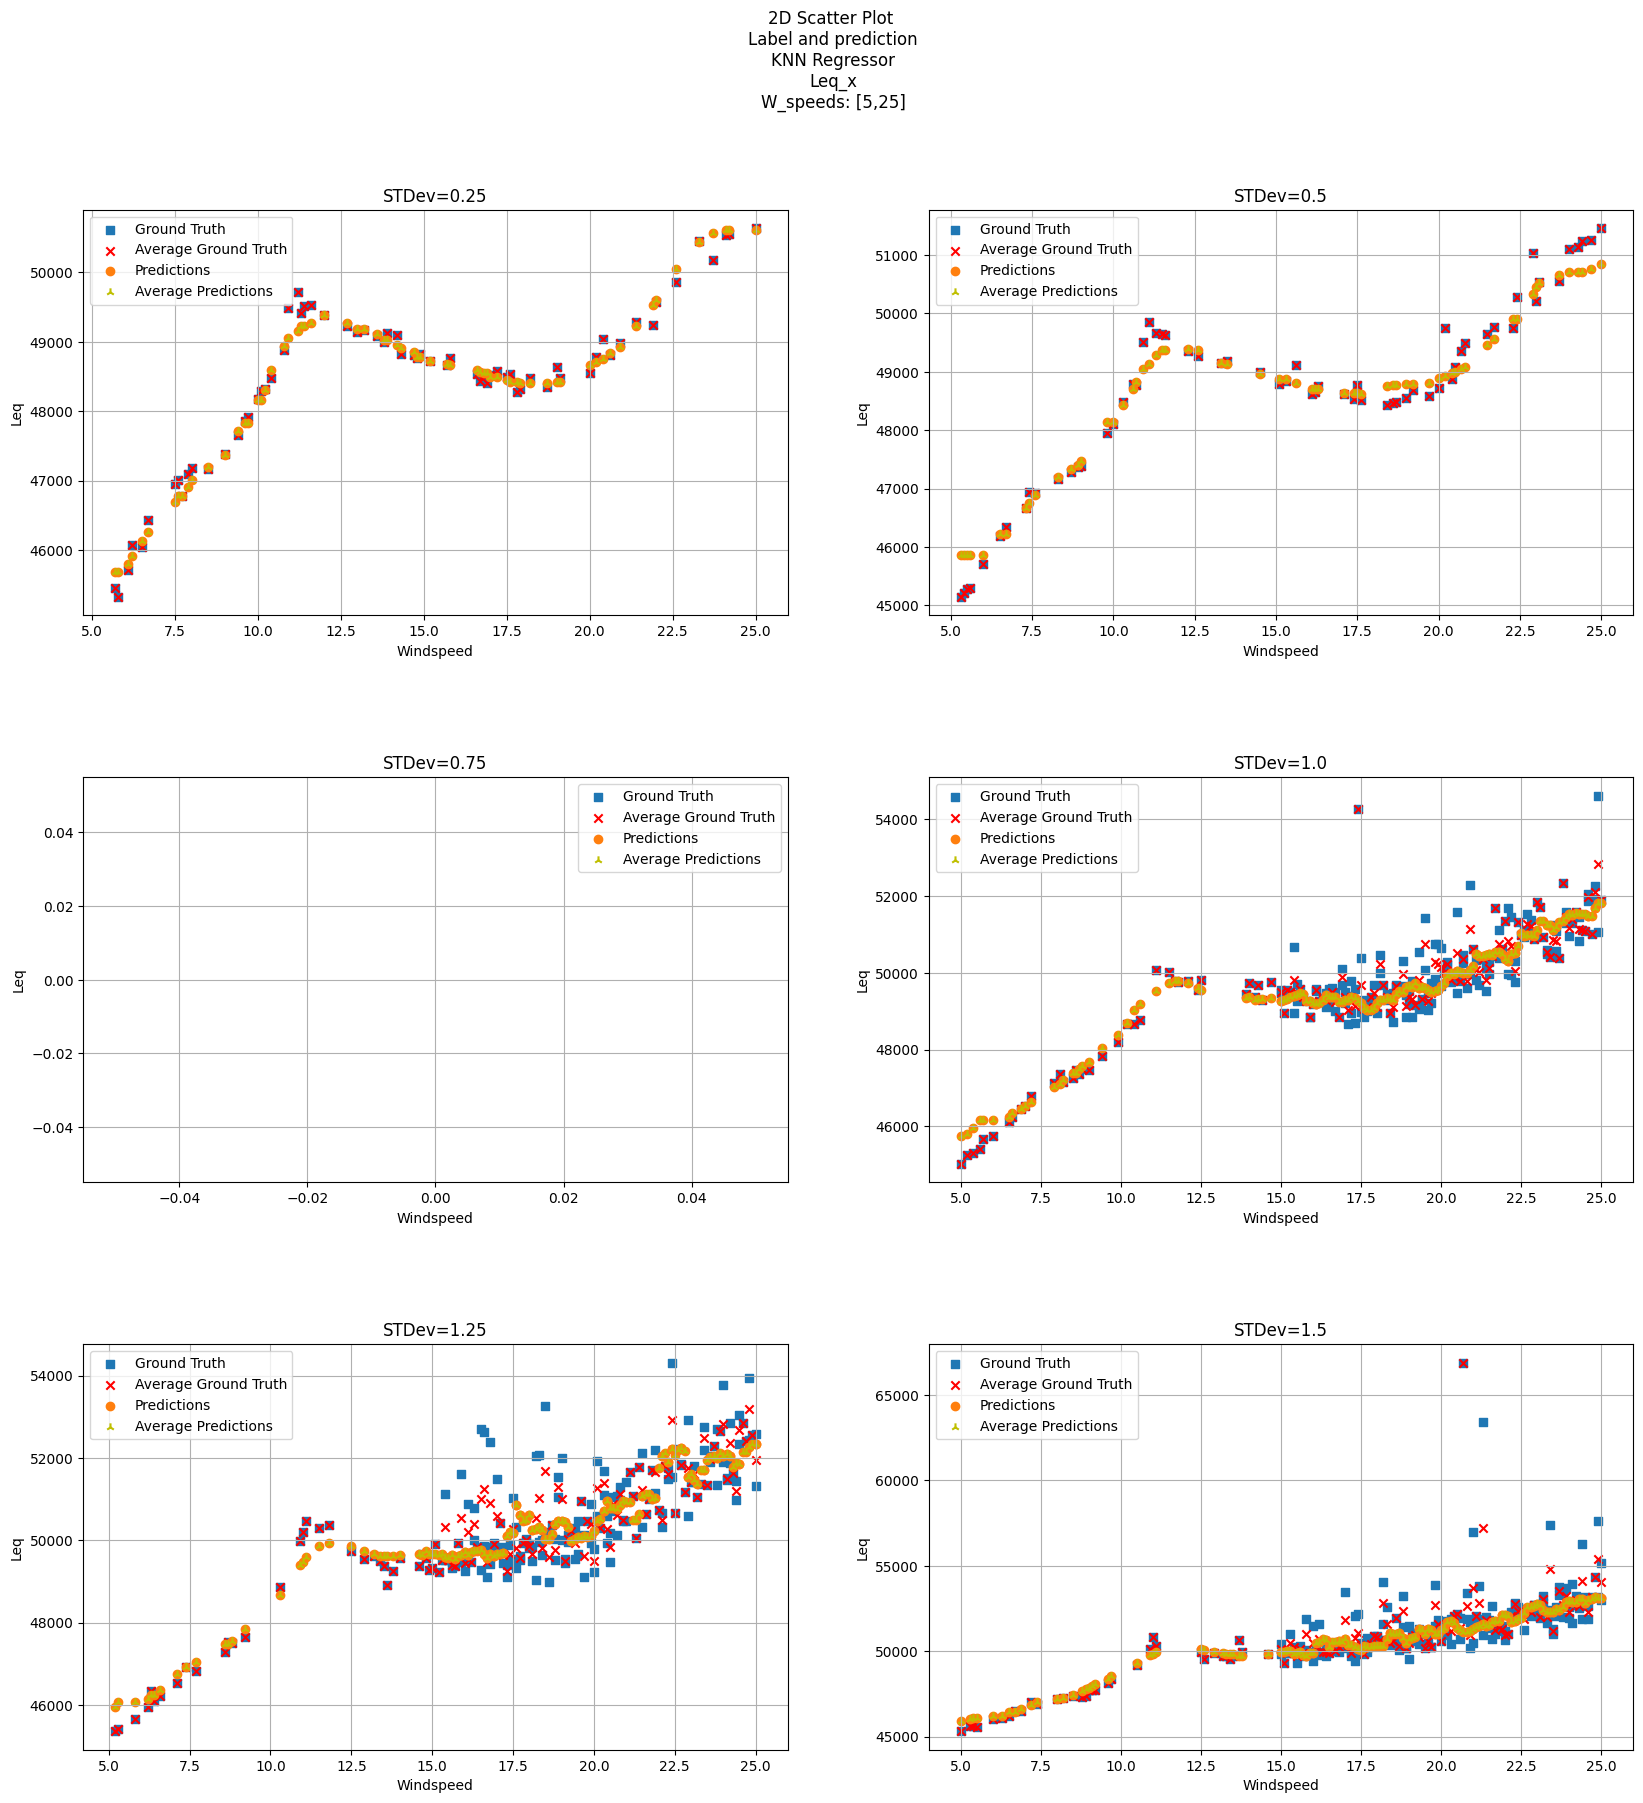

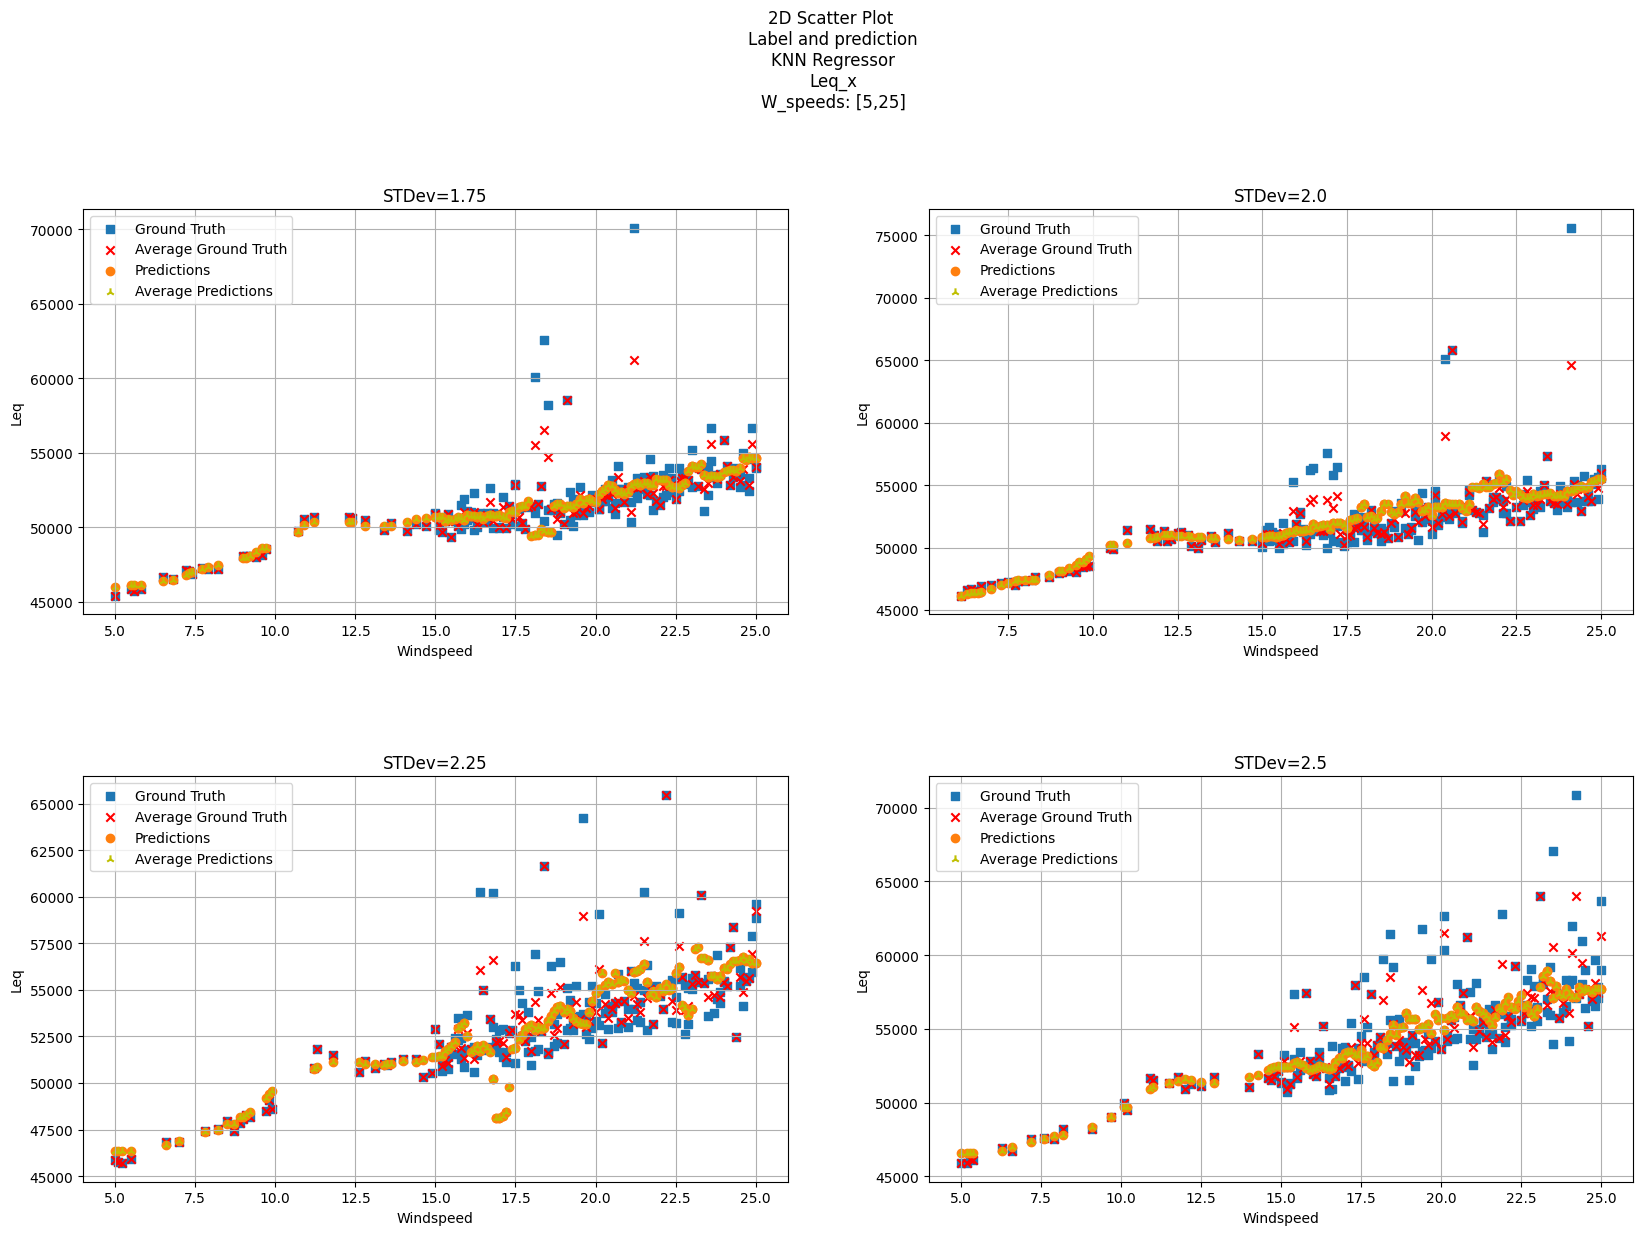

In [235]:
# all_data = pd.DataFrame(np.column_stack((must_df['Windspeed','STDeV'], must_df[target_DEL])), columns=['Windspeed', 'STDeV', 'Leq'])
ground_truth = pd.DataFrame(np.column_stack((X_test_rescaled[:,:2], y_test)), columns=['Windspeed', 'STDeV', 'Leq'])
predictions = pd.DataFrame(np.column_stack((X_test_rescaled[:,:2], knn_best_pred)), columns=['Windspeed', 'STDeV', 'Leq'])


ground_truth_average = ground_truth.groupby(['Windspeed', 'STDeV'])['Leq'].mean().reset_index()
predictions_average = predictions.groupby(['Windspeed', 'STDeV'])['Leq'].mean().reset_index()

print("Several plots of result:")
from Models.Must.Traditional_AI_techniques.Plot_data import *
# %matplotlib qt
%matplotlib inline
# plot_label_pred_3D(ground_truth, predictions, title=f'KNN Regressor\n{target_DEL}')
# plot_err_3D(ground_truth, predictions, title=f'KNN Regressor\n{target_DEL}')

# plot_label_pred_2D(ground_truth, predictions, title=f'KNN Regressor\n{target_DEL}',STDeV=all)
# plot_err_2D(ground_truth, predictions, title=f'KNN Regressor\n{target_DEL}',STDeV=all, error_type='relative')

# plot_mean_error(ground_truth, predictions, title=f'KNN Regressor\n{target_DEL}', variant='Windspeed', error_type='relative')
# plot_mean_error(ground_truth, predictions, title='KNN Regressor\n{target_DEL}', variant='STDeV', error_type='relative')

plot_label_pred_2D_mean(ground_truth, predictions, title=f'KNN Regressor\n{target_DEL}')
# plot_pred_error_2D_mean(ground_truth, predictions, title= f'KNN Regressor \n{target_DEL}')
plt.show()
